In [0]:
# Autoencoders data compression algorithm
# Applications : Data denoising and dimensionality reduction for data visualization
# Requirements :  - an encoding function
#                 - a decoding function
#                 - a loss function (distance function between the amount of information loss 
#                between the compressed representation of your data and the decompressed representation)
# 
# This exercise is adapted from https://blog.keras.io/building-autoencoders-in-keras.html by Lavsen Dahal

# Single Fully Connected layer as encoder and decoder

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats ->compression factor - 24.5, assuming the input is 784 floats (MNIST data image size- 28x28)

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
#Input data - MNIST
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
# Normalize the images and flatten the array. 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.3619 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2630 - val_loss: 0.2513
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2412 - val_loss: 0.2287
Epoch 4/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.2212 - val_loss: 0.2109
Epoch 5/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.2059 - val_loss: 0.1982
Epoch 6/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1950 - val_loss: 0.1892
Epoch 7/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1869 - val_loss: 0.1820
Epoch 8/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1804 - val_loss: 0.1761
Epoch 9/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1749 - val_loss: 0.1708
Epoch

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

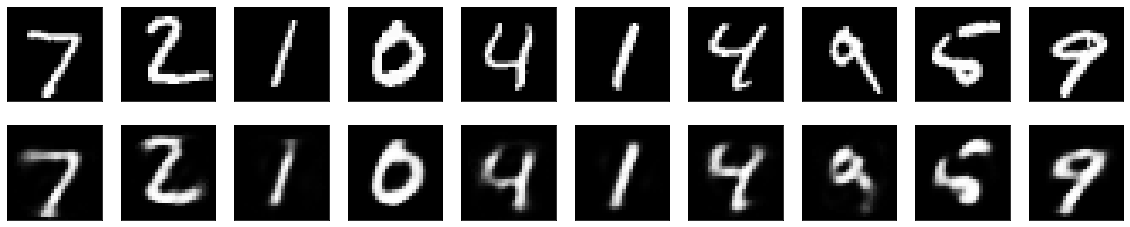

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will displaynepa
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()